In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Skating').getOrCreate()
spark

24/02/09 13:06:10 WARN Utils: Your hostname, Sams-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.118 instead (on interface en0)
24/02/09 13:06:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/09 13:06:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


24/02/09 13:06:28 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [4]:
x = spark.read.csv('Skateboarding.csv')
x
x.show()

+----------------+------------------+----------------+------------+-------------+--------------------+--------------------+--------------------+--------+---------+
|             _c0|               _c1|             _c2|         _c3|          _c4|                 _c5|                 _c6|                 _c7|     _c8|      _c9|
+----------------+------------------+----------------+------------+-------------+--------------------+--------------------+--------------------+--------+---------+
|            Name|Street League Wins|TOP 3 Finish SLS|X-Games Wins|Olympics 2020|World Championshi...|World Championshi...|World Championshi...|Dew Tour|   Nation|
|   Shane O' Neil|                 2|               1|           1|         NULL|                   1|                   2|                NULL|    NULL|Australia|
|      Chris Cole|                 1|               3|        NULL|         NULL|                   1|                   1|                   1|    NULL|      USA|
|    Nyjah Husto

In [5]:
x.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)



In [21]:
from pyspark.sql.functions import col
y = x.withColumn("numeric_column", col("_c1").cast("numeric"))
y.show()


+----------------+------------------+----------------+------------+-------------+--------------------+--------------------+--------------------+--------+---------+--------------+
|             _c0|               _c1|             _c2|         _c3|          _c4|                 _c5|                 _c6|                 _c7|     _c8|      _c9|numeric_column|
+----------------+------------------+----------------+------------+-------------+--------------------+--------------------+--------------------+--------+---------+--------------+
|            Name|Street League Wins|TOP 3 Finish SLS|X-Games Wins|Olympics 2020|World Championshi...|World Championshi...|World Championshi...|Dew Tour|   Nation|          NULL|
|   Shane O' Neil|                 2|               1|           1|         NULL|                   1|                   2|                NULL|    NULL|Australia|             2|
|      Chris Cole|                 1|               3|        NULL|         NULL|                   1|   

In [24]:
#Getting DATA INSIGHTS with Filter
y.filter("_c1 > 1").show()


+-------------+---+---+---+----+---+---+----+----+---------+--------------+
|          _c0|_c1|_c2|_c3| _c4|_c5|_c6| _c7| _c8|      _c9|numeric_column|
+-------------+---+---+---+----+---+---+----+----+---------+--------------+
|Shane O' Neil|  2|  1|  1|NULL|  1|  2|NULL|NULL|Australia|             2|
| Nyjah Huston|  5|  6|  6|NULL|  6|  5|NULL|   1|      USA|             5|
+-------------+---+---+---+----+---+---+----+----+---------+--------------+



In [43]:
y.filter("_c6 > 1").show()
x.filter(x['_c2'] >= 2).show()

+-------------+---+---+---+----+---+---+----+----+---------+--------------+
|          _c0|_c1|_c2|_c3| _c4|_c5|_c6| _c7| _c8|      _c9|numeric_column|
+-------------+---+---+---+----+---+---+----+----+---------+--------------+
|Shane O' Neil|  2|  1|  1|NULL|  1|  2|NULL|NULL|Australia|             2|
| Nyjah Huston|  5|  6|  6|NULL|  6|  5|NULL|   1|      USA|             5|
+-------------+---+---+---+----+---+---+----+----+---------+--------------+

+----------------+----+---+----+------+----+----+----+----+--------+
|             _c0| _c1|_c2| _c3|   _c4| _c5| _c6| _c7| _c8|     _c9|
+----------------+----+---+----+------+----+----+----+----+--------+
|      Chris Cole|   1|  3|NULL|  NULL|   1|   1|   1|NULL|     USA|
|    Nyjah Huston|   5|  6|   6|  NULL|   6|   5|NULL|   1|     USA|
|Luan de Oliveira|NULL|  2|NULL|  NULL|NULL|NULL|   2|NULL|  Brazil|
|   Kevin Hoefler|   1|  2|   1|SILVER|   1|   1|   1|   1|  Brazil|
|   Yuto Horigome|   1|  2|   3|  GOLD|   1|   1|   1|   1| 

In [42]:
i = x.filter(x['_c3'] >= 3)
i.show()

+-------------+---+---+---+----+---+---+----+---+-----+
|          _c0|_c1|_c2|_c3| _c4|_c5|_c6| _c7|_c8|  _c9|
+-------------+---+---+---+----+---+---+----+---+-----+
| Nyjah Huston|  5|  6|  6|NULL|  6|  5|NULL|  1|  USA|
|Yuto Horigome|  1|  2|  3|GOLD|  1|  1|   1|  1|Japan|
+-------------+---+---+---+----+---+---+----+---+-----+



In [44]:
x.filter(x['_c9'] != 'USA').show()

+----------------+------------------+----------------+------------+-------------+--------------------+--------------------+--------------------+--------+---------+
|             _c0|               _c1|             _c2|         _c3|          _c4|                 _c5|                 _c6|                 _c7|     _c8|      _c9|
+----------------+------------------+----------------+------------+-------------+--------------------+--------------------+--------------------+--------+---------+
|            Name|Street League Wins|TOP 3 Finish SLS|X-Games Wins|Olympics 2020|World Championshi...|World Championshi...|World Championshi...|Dew Tour|   Nation|
|   Shane O' Neil|                 2|               1|           1|         NULL|                   1|                   2|                NULL|    NULL|Australia|
|Luan de Oliveira|              NULL|               2|        NULL|         NULL|                NULL|                NULL|                   2|    NULL|   Brazil|
|    Ryan Decenz

In [53]:
# PySpark groupby
x.groupBy('_c1').min().show()
z = x.groupBy('_c5').max()
z.show()


+------------------+
|               _c1|
+------------------+
|                 5|
|Street League Wins|
|                 1|
|                 2|
|              NULL|
+------------------+

+--------------------+
|                 _c5|
+--------------------+
|                   6|
|World Championshi...|
|                   1|
|                NULL|
+--------------------+



In [54]:
x.groupBy('_c9').count().show()

+---------+-----+
|      _c9|count|
+---------+-----+
|   France|    1|
|Argentina|    1|
|      USA|   13|
|   Nation|    1|
|   Canada|    1|
|   Brazil|    3|
|    Japan|    4|
| Portugal|    1|
|Australia|    1|
+---------+-----+



In [56]:
x.describe().show()

24/02/09 14:07:33 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------+------------------+------------------+-----------------+------+--------------------+--------------------+--------------------+--------+---------+
|summary|          _c0|               _c1|               _c2|              _c3|   _c4|                 _c5|                 _c6|                 _c7|     _c8|      _c9|
+-------+-------------+------------------+------------------+-----------------+------+--------------------+--------------------+--------------------+--------+---------+
|  count|           26|                11|                16|                9|     3|                   9|                   9|                  12|       7|       26|
|   mean|         NULL|               1.5|               1.8|            1.875|  NULL|               1.625|               1.625|  1.0909090909090908|     1.0|     NULL|
| stddev|         NULL|1.2692955176439846|1.3201731488169053|1.807721533549109|  NULL|  1.7677669529663689|   1.407885953173359| 0.30151134457776363|     0

In [ ]:
#Making since of the DATA
Above_Avg_SLS = ['Nyjah Huston', 'Yuto Horigome', 'Shane Oneil']
World_CHampions = {'Nyjah Huston':6, 'Dashawn Jordan':1,'Aurelien Giraud':1, 'Sora Shirai':1, 'Kelvin Hoeffler':1, 'Yuto Horigome':1, 'Shane Oneil':1}
Olympic_Medalists = {'Yuto Horigome':'GOLD', 'Kelvin Hoeffler':'SILVER', 'Jagger Eaton':'BRONZE'}
Popularity_Professional_Nations = {'USA':13, 'Japan':4, 'Brazil':3}

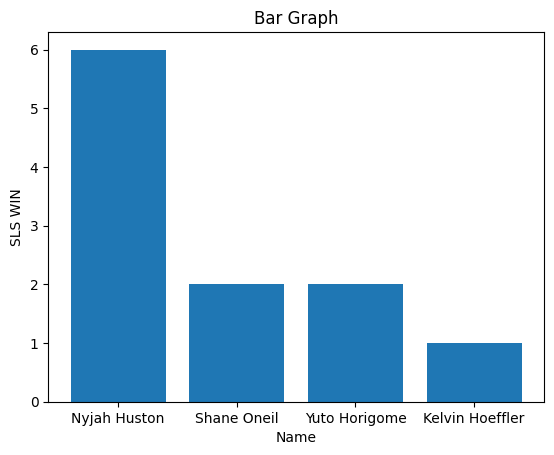

In [58]:
import matplotlib.pyplot as plt
#Graphing Our DATA
data = [("Nyjah Huston", 6), ("Shane Oneil", 2), ("Yuto Horigome", 2), ("Kelvin Hoeffler", 1)]
df = spark.createDataFrame(data, ["Name", "SLS WIN"])

# Convert DataFrame to Pandas DataFrame for plotting
pandas_df = df.toPandas()

# Plotting
plt.bar(pandas_df["Name"], pandas_df["SLS WIN"])
plt.xlabel("Name")
plt.ylabel("SLS WIN")
plt.title("Bar Graph")
plt.show()